In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
###os.environ["DML_VISIBLE_DEVICES"] = "0" 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import efficientnet.keras as efn
from keras import layers

# Load the file from the dataset

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'archive/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'archive/test',
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical')

Found 647 images belonging to 7 classes.
Found 242 images belonging to 7 classes.


In [3]:
emotion_dict={0 : 'anger', 1 : 'contempt', 2 : 'disgust', 3 : 'fear', 4 : 'happy',5 :'sadness',6 :'surprise'}

# Split the dataset into test , train

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

base_model = efn.EfficientNetB0(input_shape = (64,64,3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(7, activation='softmax')(x)

model1 = tf.keras.models.Model(base_model.input, x)

model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Data Augmentaion


In [5]:
history=model1.fit(train_generator,epochs=25,validation_data=validation_generator)

Epoch 1/25
11/11 [==============================] - 13s 609ms/step - loss: 1.7508 - accuracy: 0.4606 - val_loss: 0.6375 - val_accuracy: 0.8140
Epoch 2/25
11/11 [==============================] - 4s 350ms/step - loss: 0.8596 - accuracy: 0.7094 - val_loss: 0.5239 - val_accuracy: 0.8058
Epoch 3/25
11/11 [==============================] - 4s 349ms/step - loss: 0.6467 - accuracy: 0.7821 - val_loss: 0.4934 - val_accuracy: 0.8223
Epoch 4/25
11/11 [==============================] - 4s 347ms/step - loss: 0.5474 - accuracy: 0.8130 - val_loss: 0.4917 - val_accuracy: 0.8264
Epoch 5/25
11/11 [==============================] - 4s 351ms/step - loss: 0.4265 - accuracy: 0.8547 - val_loss: 0.5008 - val_accuracy: 0.8430
Epoch 6/25
11/11 [==============================] - 4s 352ms/step - loss: 0.3682 - accuracy: 0.8640 - val_loss: 0.4298 - val_accuracy: 0.8347
Epoch 7/25
11/11 [==============================] - 4s 350ms/step - loss: 0.3588 - accuracy: 0.8686 - val_loss: 0.3771 - val_accuracy: 0.8760
Epoch

In [6]:
model1.save('project_ck_efficientnet')

INFO:tensorflow:Assets written to: project_ck_efficientnet\assets


INFO:tensorflow:Assets written to: project_ck_efficientnet\assets


# Plot the Graph to check the how good the model is working

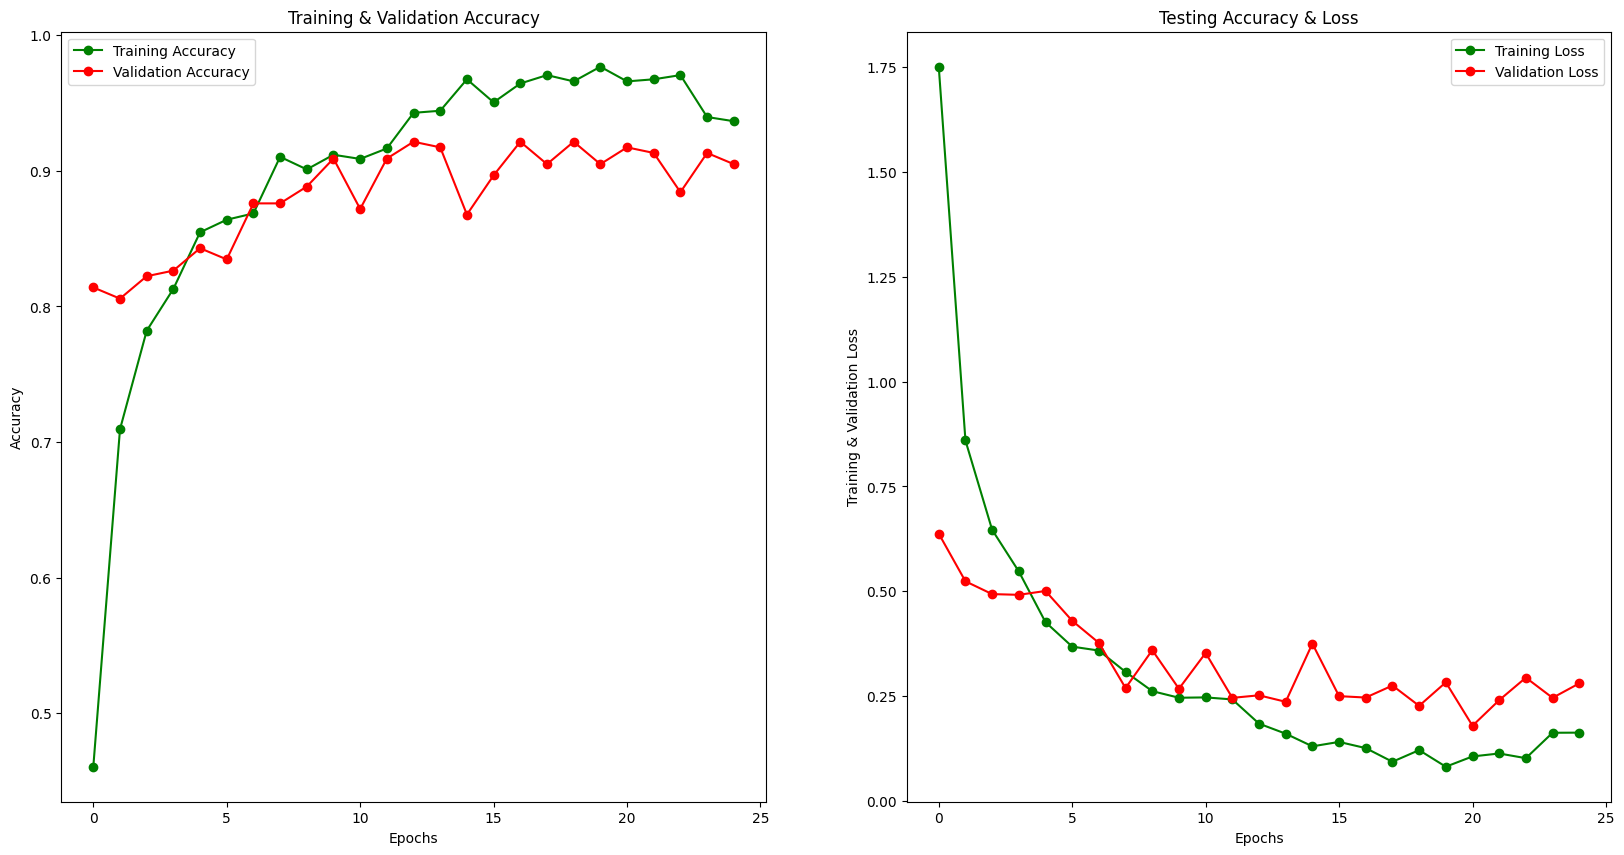

In [7]:
import matplotlib.pyplot as plt
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Creating Confusion Matrix to know the performance of Model

11/11 [==============================] - 4s 238ms/step
-----------------------------------------------------------------
[[ 0  5 11  5  1  6  7]
 [ 3  3  8  6  9  5 10]
 [ 6  8 23 14 43 14 28]
 [ 3  1 12  8 19  3 14]
 [11  9 36 12 47 15 38]
 [ 3  4 14  6 20  8 13]
 [ 6 11 32  9 31 21 26]]


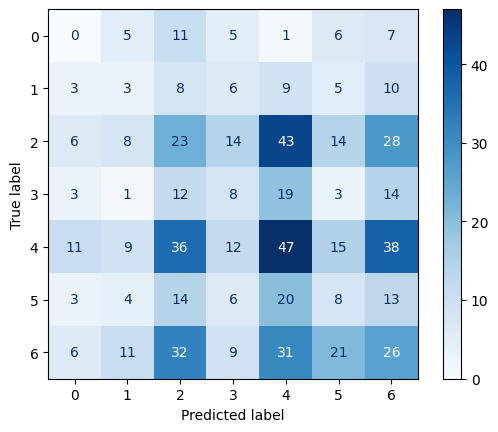

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.07      0.07      0.07        44
           2       0.17      0.17      0.17       136
           3       0.13      0.13      0.13        60
           4       0.28      0.28      0.28       168
           5       0.11      0.12      0.11        68
           6       0.19      0.19      0.19       136

    accuracy                           0.18       647
   macro avg       0.14      0.14      0.14       647
weighted avg       0.18      0.18      0.18       647



In [8]:
tr_predictions = model1.predict(train_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_generator.classes, tr_predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(train_generator.classes, tr_predictions.argmax(axis=1)))
clf_report = classification_report(train_generator.classes, tr_predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

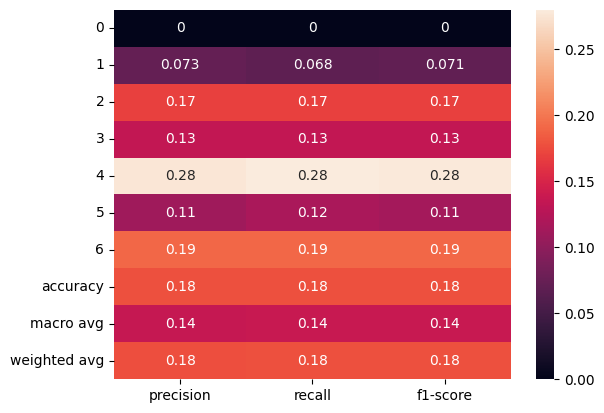

In [9]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

4/4 [==============================] - 1s 230ms/step
-----------------------------------------------------------------
[[ 0  1  0  1  1  1  4]
 [ 0  0  1  1  0  2  6]
 [ 1  2  8  2  8  2 18]
 [ 1  0  2  1  2  3  6]
 [ 2  1  9  0  7  3 17]
 [ 1  0  4  0  4  1  6]
 [ 4  5 19 11 17 11 46]]


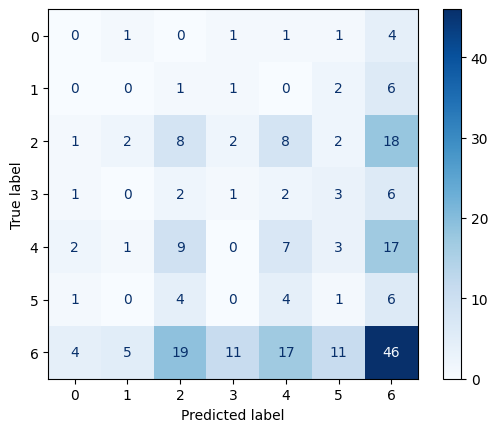

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        10
           2       0.19      0.20      0.19        41
           3       0.06      0.07      0.06        15
           4       0.18      0.18      0.18        39
           5       0.04      0.06      0.05        16
           6       0.45      0.41      0.43       113

    accuracy                           0.26       242
   macro avg       0.13      0.13      0.13       242
weighted avg       0.28      0.26      0.27       242



In [10]:
# do prediction on test data
predictions = model1.predict(validation_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))
clf_report1 = classification_report(validation_generator.classes, predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

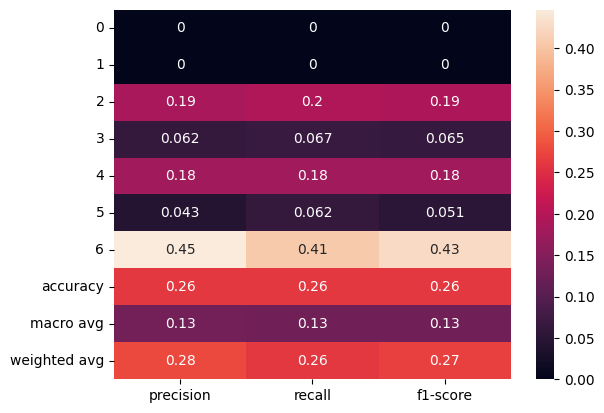

In [11]:
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True)

# To Predict Mood using Webcam (Doesn't work on kraggle)
# Download the Casscade File on your System and run the code

In [ ]:
# size = 4
# webcam = cv2.VideoCapture(0) #Use camera 0

# # We load the xml file
# classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# while True:
#     (rval, im) = webcam.read()
#     im=cv2.flip(im,1,1) #Flip to act as a mirror

#     # Resize the image to speed up detection
#     mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

#     # detect MultiScale / faces 
#     faces = classifier.detectMultiScale(mini)

#     # Draw rectangles around each face
#     for f in faces:
#         (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
#         #Save just the rectangle faces in SubRecFaces
#         face_img = im[y:y+h, x:x+w]
#         resized=cv2.resize(face_img,(48,48))
#         normalized=resized/255.0
#         reshaped=np.reshape(normalized,(1,48,48,3))
#         reshaped = np.vstack([reshaped])
#         result=model.predict(reshaped)

#         #print(result)
        
#         label=np.argmax(result,axis=1)[0]
      
#         cv2.rectangle(im,(x,y),(x+w,y+h),(0, 0, 225),2)
#         cv2.rectangle(im,(x,y-40),(x+w,y),(0, 0, 225),-1)
#         cv2.putText(im,labels[label] , (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
#     # Show the image
#     cv2.imshow('LIVE',   im)
#     key = cv2.waitKey(10)
#     # if Esc key is press then break out of the loop 
#     if key == 27: #The Esc key
#         break
# # Stop video
# webcam.release()

# # Close all started windows
# cv2.destroyAllWindows()

AttributeError: ignored

1/1 [==============================] - 0s 16ms/step
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
disgust


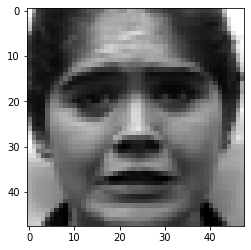

In [ ]:
img = load_img("/content/data/CK+48/fear/S011_003_00000012.png",target_size = (48,48))
img = np.array(img)
plt.imshow(img)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,3)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(labels[img_index])

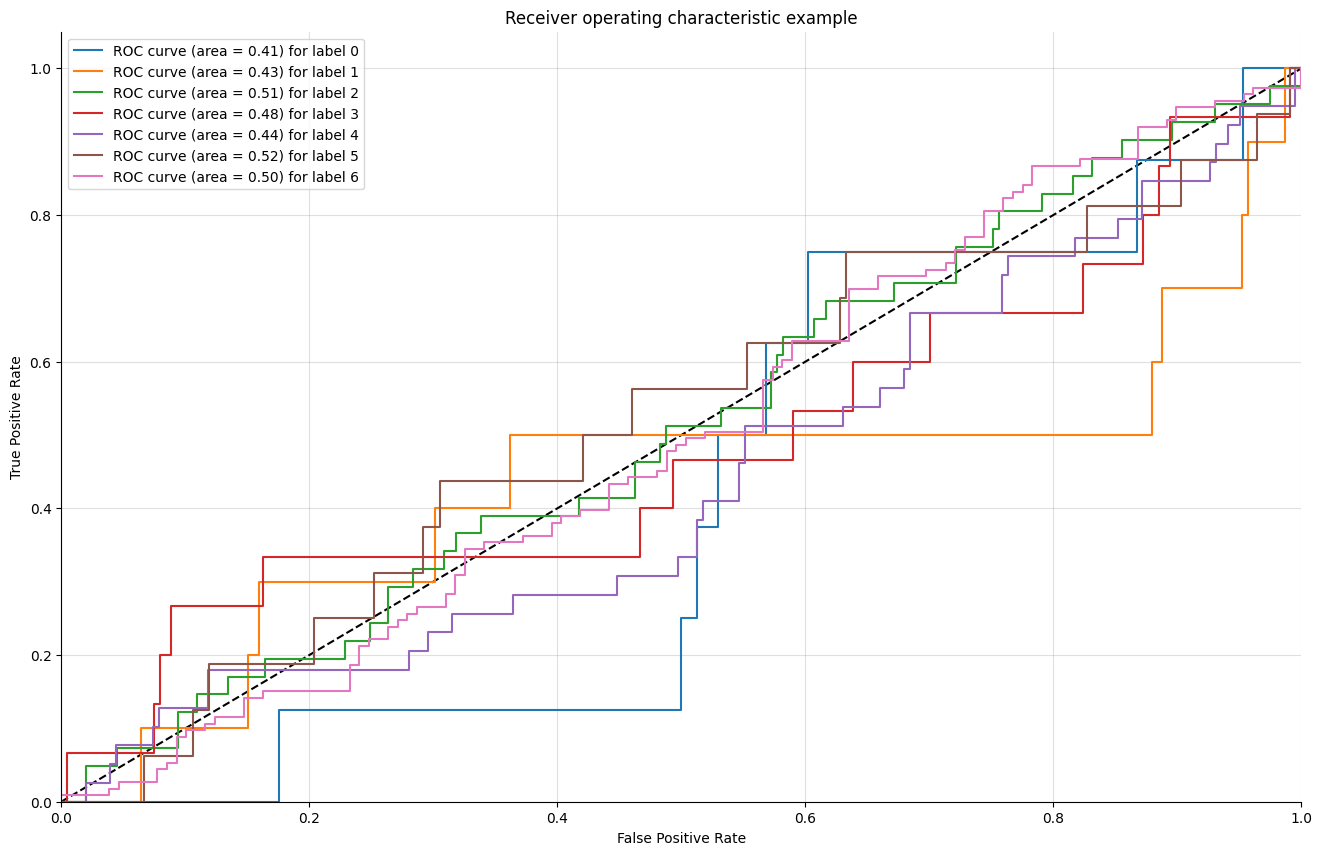

In [12]:
def plot_multiclass_roc( prediction, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(predictions, validation_generator.classes, n_classes=7, figsize=(16, 10))